## Hateful Memes Detection Using Facebook Meme Dataset
Hate speech has become an unfortunate reality in today's digital age, permeating both offline and online communication channels. The anonymity afforded by virtual platforms often emboldens individuals to express hurtful or discriminatory sentiments without facing immediate consequences. This has created a pressing need for robust systems capable of identifying and mitigating hate speech, especially in the dynamic and multimodal landscape of social media.


**Using google Mount drive to access data**

In [3]:
from google.colab import drive
drive.mount("/content/hatefulmeme")

Mounted at /content/hatefulmeme


**Extracting the zipped folder containing images**

In [6]:
!unzip /content/hatefulmeme/MyDrive/hatefulmeme/facebook.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/img/49758.png      
  inflating: data/img/49762.png      
  inflating: data/img/49785.png      
  inflating: data/img/49786.png      
  inflating: data/img/49802.png      
  inflating: data/img/49805.png      
  inflating: data/img/49806.png      
  inflating: data/img/49807.png      
  inflating: data/img/49810.png      
  inflating: data/img/49826.png      
  inflating: data/img/49831.png      
  inflating: data/img/49832.png      
  inflating: data/img/49836.png      
  inflating: data/img/49850.png      
  inflating: data/img/49856.png      
  inflating: data/img/49861.png      
  inflating: data/img/49863.png      
  inflating: data/img/49867.png      
  inflating: data/img/49870.png      
  inflating: data/img/50124.png      
  inflating: data/img/50126.png      
  inflating: data/img/50129.png      
  inflating: data/img/50137.png      
  inflating: data/img/50142.png      
  inflating: data/img/50146.png      

**Reading the text from json files into dataframes**

In [7]:
import json
with open("/content/data/train.jsonl") as f:
  arr_train = f.readlines()


In [8]:
import json
with open("/content/data/test.jsonl") as f:
  arr_test = f.readlines()


In [9]:
import json
with open("/content/data/dev.jsonl") as f:
  arr_dev = f.readlines()


In [35]:
def data_to_dataframe(records):
    '''
    Extracts data from an array of records into a pandas DataFrame.

    Args:
    - records: Array of records, each record containing 'id', 'img', 'label', and 'text' fields.

    Returns:
    - df: DataFrame containing all features extracted from the records.
    '''

    df = {}
    df["id"] = []
    df["img_name"] = []
    df["label"] = []
    df["text"] = []

    print("Starting data extraction...")

    for record in records:
        record_json = json.loads(record)

        record_id = record_json["id"]
        image_name = record_json["img"]
        label = record_json["label"]
        text = record_json["text"]

        df["id"].append(record_id)
        df["img_name"].append(image_name)
        df["label"].append(label)
        df["text"].append(text)

    print("Data extraction completed.")

    return pd.DataFrame(df)

In [36]:
def data_to_dataframe_test(records):
    '''
    Extracts data from an array of records into a pandas DataFrame.

    Args:
    - records: Array of records, each record containing 'id', 'img', and 'text' fields.

    Returns:
    - df: DataFrame containing extracted features from the records.
    '''

    df = {}
    df["id"] = []
    df["img_name"] = []

    df["text"] = []
    print("Starting data extraction...")
    for record in records:
        record_json = json.loads(record)

        record_id = record_json["id"]
        image_name = record_json["img"]
        text = record_json["text"]

        df["id"].append(record_id)
        df["img_name"].append(image_name)
        df["text"].append(text)

    print("Data extraction completed.")

    return pd.DataFrame(df)

In [37]:
import pandas as pd
# Convert training, testing, and development data from arrays of records to dataframes
train_data_dict = data_to_dataframe(arr_train)
test_data_dict = data_to_dataframe_test(arr_test)
dev_data_dict = data_to_dataframe(arr_dev)

# Convert dictionaries to dataframes
train_dataframe = pd.DataFrame(train_data_dict)
train_dataframe["img_name"] = "data/"+train_dataframe["img_name"]
train_dataframe.head()

Starting extraction....
Extraction over...
Starting extraction....
Extraction over...
Starting extraction....
Extraction over...


,id,img_name,label,text
0,42953,data/img/42953.png,0,its their character not their color that matters
1,23058,data/img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,data/img/13894.png,0,putting bows on your pet
3,37408,data/img/37408.png,0,i love everything and everybody! except for sq...
4,82403,data/img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [41]:
# Convert development data dictionary to a dataframe
dev_dataframe = pd.DataFrame(dev_data_dict)
dev_dataframe["img_name"] = "data/"+dev_dataframe["img_name"]
dev_dataframe.head()

,id,img_name,label,text
0,8291,data/img/08291.png,1,white people is this a shooting range
1,46971,data/img/46971.png,1,bravery at its finest
2,3745,data/img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,data/img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,data/img/80243.png,1,mississippi wind chime


In [42]:
# Convert test data dictionary to a dataframe
test_dataframe = pd.DataFrame(test_data_dict)
test_dataframe["img_name"] = "data/"+test_dataframe["img_name"]
test_dataframe.head()

,id,img_name,text
0,16395,data/img/16395.png,handjobs sold seperately
1,37405,data/img/37405.png,introducing fidget spinner for women
2,94180,data/img/94180.png,happy pride month let's go beat up lesbians
3,54321,data/img/54321.png,laughs in [majority of u.s crime rate]
4,97015,data/img/97015.png,finds out those 72 virgins.. are goats


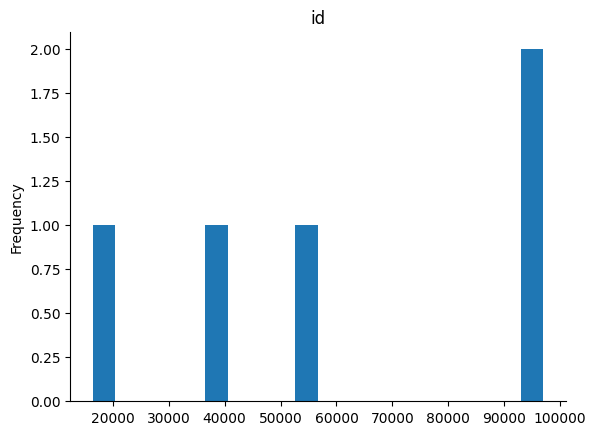

In [43]:
# Plotting a histogram of the 'id' column
from matplotlib import pyplot as plt
_df_22['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
!pip install transformers

In [44]:
from transformers import BertTokenizer,BertModel
# The BERT model processes the concatenated feature vector to classify memes into hateful or non-hateful categories
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [28]:
!pip install keras_preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


In [48]:
import numpy as np
from torch.utils.data import DataLoader,Dataset
from torchvision import transforms
import torch
import cv2
from keras_preprocessing.sequence  import pad_sequences

class MemeDataset(Dataset):
    '''Custom class for meme dataset
    Args:
        csv: DataFrame containing meme data
        transforms: Optional data transformations
    '''

    def __init__(self, csv, transforms=None):
        self.csv = csv
        self.transforms = transforms

    def __len__(self):
        return len(self.csv)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        req = self.csv.iloc[idx]
        img_name = req.img_name
        img_label = [req.label]
        text = req.text
        encoding = tokenizer.encode(text)
        # print(encoding)
        encoding = pad_sequences([encoding], maxlen=20, padding="post")
        mask = encoding.copy()
        mask[mask > 0] = 1
        # embedding =  bert(input_ids=torch.LongTensor(encoding).squeeze(1))[0]
        img = cv2.imread(img_name)
        if self.transforms:
            img = self.transforms(img)

        sample = {"image": img, "label": torch.FloatTensor(img_label), "text": text, "embeddings": torch.LongTensor(encoding), "attn": torch.FloatTensor(mask)}

        return sample



In [49]:
import numpy as np
from torch.utils.data import DataLoader,Dataset
from torchvision import transforms
import torch
import cv2
from keras_preprocessing.sequence  import pad_sequences

class MemeDatasetTest(Dataset):
    '''Custom class for meme dataset for testing
    Args:
        csv: DataFrame containing meme data
        transforms: Optional data transformations
    '''

    def __init__(self, csv, transforms=None):
        self.csv = csv
        self.transforms = transforms

    def __len__(self):
        return len(self.csv)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        req = self.csv.iloc[idx]
        img_name = req.img_name
        text = req.text
        encoding = tokenizer.encode(text)
        # print(encoding)
        encoding = pad_sequences([encoding], maxlen=20, padding="post")
        mask = encoding.copy()
        mask[mask > 0] = 1
        # embedding =  bert(input_ids=torch.LongTensor(encoding).squeeze(1))[0]
        img = cv2.imread(img_name)
        if self.transforms:
            img = self.transforms(img)

        sample = {"image": img, "text": text, "embeddings": torch.LongTensor(encoding), "attn": torch.FloatTensor(mask)}

        return sample



**Setting up transforms for iamges**

In [50]:
# Define a series of transformations to be applied to the images, including converting them to PIL format, resizing them to (224, 224), and converting them to tensors
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Create an instance of the Meme_Dataset class using the training dataframe and the defined transformations
meme_dataset = Meme_Dataset(train_dataframe, transform)
sample = meme_dataset[0]
print(sample["attn"].size())

torch.Size([1, 20])

In [51]:
sample["embeddings"]

tensor([[ 101, 2049, 2037, 2839, 2025, 2037, 3609, 2008, 5609,  102,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])

In [52]:
sample["attn"]

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

**Using data split for training and testing and setting up dataloaders**

In [53]:
dataloader = DataLoader(meme_dataset,shuffle=True,batch_size=32)
sample = next(iter(dataloader))

In [54]:
# Create training, development, and test datasets using the Meme_Dataset and Meme_Dataset_Test classes with the specified transformations
train_dataset = Meme_Dataset(train_dataframe,transforms=transform)
dev_dataset = Meme_Dataset(dev_dataframe,transform)
test_dataset = Meme_Dataset_Test(test_dataframe,transform)

In [55]:
# Create data loaders for training, development, and test datasets with specified batch sizes and shuffling for training and development
train_dataloader = DataLoader(train_dataset,shuffle=True,batch_size=8)
dev_dataloader = DataLoader(dev_dataset,shuffle=True,batch_size=8)
test_dataloader = DataLoader(test_dataset,batch_size=8)

**Define a convolutional part of a neural network for image processing**

In [56]:
import torch.nn as nn
import torch.nn.functional as F
class Convpart(nn.Module):
    def __init__(self):
        super(Convpart, self).__init__()

        # Define sequential blocks for convolutional layers and pooling layers
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=5, padding=2),
            nn.Conv2d(128, 64, kernel_size=5, padding=2),
            nn.AvgPool2d(kernel_size=3, padding=1)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
            nn.Conv2d(64, 32, kernel_size=5, padding=2),
            nn.MaxPool2d(kernel_size=3, padding=1)
        )
        self.dropout = nn.Dropout(0.7)
        self.block3 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, 32, kernel_size=5, padding=2),
            nn.MaxPool2d(kernel_size=3, padding=1)
        )
        self.flat = nn.Flatten()

        # Define fully connected layers
        self.fc1 = nn.Linear(2592, 1500)
        self.fc2 = nn.Linear(1500, 1000)
        self.fc3 = nn.Linear(1000, 768)
        self.flat = nn.Flatten()

    def forward(self, x):
        # Forward pass through convolutional blocks and fully connected layers
        x = F.relu(self.block1(x), inplace=False)
        x = F.relu(self.block2(x), inplace=False)
        x = F.relu(self.dropout(self.block3(x)), inplace=False)
        x = self.flat(x)
        x = F.relu(self.fc1(x), inplace=False)
        x = F.relu(self.fc2(x), inplace=False)
        out = self.flat(F.relu(self.fc3(x)))

        return out

In [57]:
from torchvision.models import vgg16,resnet18,mobilenet_v2
# Load the pre-trained VGG16 model
vgg = vgg16(pretrained=True)

# Load the pre-trained ResNet18 model
resnet = resnet18(pretrained=True)

# Load the pre-trained MobileNetV2 model
mobilenet = mobilenet_v2(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 146MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. 

In [58]:
class VGG_Part(nn.Module):
    def __init__(self):
        super(VGG_Part, self).__init__()

        # Initialize the VGG model and remove the last layer (classifier)
        self.model = torch.nn.Sequential(*(list(vgg.children())[:-1]))

        # Define the max pooling layer with a kernel size of 3
        self.pooling = torch.nn.MaxPool2d(kernel_size=3)

        # Flatten the output for further processing
        self.flat_layer = nn.Flatten()

    def forward(self, x):
        """
        Forward pass of the VGG_Part module.

        Args:
        - x (torch.Tensor): Input tensor to be processed by the VGG model.

        Returns:
        - out (torch.Tensor): Output tensor after processing through VGG, pooling, and flattening.
        """
        # Pass the input tensor through the VGG model
        x = self.model(x)

        # Apply max pooling to the output of the VGG model
        x = self.pooling(x)

        # Flatten the output tensor for further processing or classification
        out = self.flat_layer(x)

        return out


In [59]:
class Resnet_Part(nn.Module):
    def __init__(self):
        super(Resnet_Part, self).__init__()

        # Initialize the ResNet model and remove the last layer (classifier)
        self.model = torch.nn.Sequential(*(list(resnet.children())[:-1]))

        # Define the max pooling layer with a kernel size of 3
        self.pooling = torch.nn.MaxPool2d(kernel_size=3)

        # Flatten the output for further processing
        self.flat_layer = nn.Flatten()

    def forward(self, x):
        """
        Forward pass of the Resnet_Part module.

        Args:
        - x (torch.Tensor): Input tensor to be processed by the ResNet model.

        Returns:
        - out (torch.Tensor): Output tensor after processing through ResNet and flattening.
        """
        # Pass the input tensor through the ResNet model
        x = self.model(x)

        # Flatten the output tensor for further processing or classification
        out = self.flat_layer(x)

        return out


In [60]:
class MobileNet_Part(nn.Module):
    def __init__(self):
        super(MobileNet_Part, self).__init__()

        # Initialize the MobileNet model and remove the last layer (classifier)
        self.model = torch.nn.Sequential(*(list(mobilenet.children())[:-1]))

        # Define the max pooling layer with a kernel size of 3
        self.pooling = torch.nn.MaxPool2d(kernel_size=3)

        # Flatten the output for further processing
        self.flat_layer = nn.Flatten()

    def forward(self, x):
        """
        Forward pass of the MobileNet_Part module.

        Args:
        - x (torch.Tensor): Input tensor to be processed by the MobileNet model.

        Returns:
        - out (torch.Tensor): Output tensor after processing through MobileNet and flattening.
        """
        # Pass the input tensor through the MobileNet model
        x = self.model(x)

        # Flatten the output tensor for further processing or classification
        out = self.flat_layer(x)

        return out


In [61]:
class Ensemble_Block(nn.Module):
    def __init__(self):
        super(Ensemble_Block, self).__init__()

        # Initialize the VGG, ResNet, and MobileNet parts of the ensemble
        self.vgg = VGG_Part()
        self.res = Resnet_Part()
        self.mobile = MobileNet_Part()

        # Fully connected layers with batch normalization and dropout
        self.fc_b1 = nn.Sequential(nn.Linear(7680, 6000), nn.BatchNorm1d(6000))
        self.d1 = nn.Dropout(0.6)
        self.fc_b2 = nn.Sequential(nn.Linear(6000, 3000), nn.BatchNorm1d(3000))
        self.d2 = nn.Dropout(0.6)

        # Final fully connected layer for ensemble prediction
        self.fc3 = nn.Linear(3000, 768)

    def forward(self, x):
        """
        Forward pass of the Ensemble_Block module.

        Args:
        - x (torch.Tensor): Input tensor to be processed by the ensemble block.

        Returns:
        - out (torch.Tensor): Output tensor after passing through the ensemble layers.
        """
        # Pass input tensor through VGG, ResNet, and MobileNet parts
        x1 = self.vgg(x)
        x2 = self.res(x)
        x3 = self.mobile(x)

        # Concatenate the output tensors from different models along the feature dimension
        out_1 = torch.cat([x1, x2, x3], dim=1)

        # Apply fully connected layers with batch normalization and dropout
        out_1 = self.d1(self.fc_b1(out_1))
        out_1 = self.d2(self.fc_b2(out_1))

        # Final fully connected layer for ensemble prediction
        out = self.fc3(out_1)

        return out



In [62]:
class BERTpart(nn.Module):
    def __init__(self):
        super(BERTpart, self).__init__()

        # Initialize the BERT model from pre-trained 'bert-base-uncased'
        self.model = BertModel.from_pretrained('bert-base-uncased')

        # Average pooling layer and flatten layer
        self.pooling = nn.AvgPool1d(kernel_size=3)
        self.flat_layer = nn.Flatten()

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.6)

        # Fully connected layer for final output
        self.fc3 = nn.Linear(5120, 768)

    def forward(self, x, attn):
        """
        Forward pass of the BERTpart module.

        Args:
        - x (torch.Tensor): Input tensor (tokenized text) to be processed by BERT.
        - attn (torch.Tensor): Attention mask tensor corresponding to the input tensor.

        Returns:
        - out (torch.Tensor): Output tensor after passing through the BERT and fully connected layers.
        """
        # Pass input tensor through BERT model with attention mask
        x = self.model(input_ids=x.squeeze(1), encoder_attention_mask=attn)[0]

        # Apply average pooling and flatten layers
        x = self.pooling(x)
        x = self.flat_layer(x)

        # Apply dropout for regularization and pass through fully connected layer
        x = self.dropout(x)
        out = F.relu(self.fc3(x), inplace=False)

        return out



In [63]:
class MemeNet(nn.Module):
    def __init__(self):
        super(MemeNet, self).__init__()

        # Initialize sub-modules
        self.bert_part = BERTpart()
        self.batch_norm = nn.BatchNorm1d(6000)
        self.ensemble = Ensemble_Block()

        # Fully connected layers for final classification
        self.fc1 = nn.Linear(1536, 6000)
        self.fc2 = nn.Linear(6000, 3000)
        self.fc3 = nn.Linear(3000, 1)

    def forward(self, image, text, attn):
        """
        Forward pass of the MemeNet module.

        Args:
        - image (torch.Tensor): Input tensor representing the image.
        - text (torch.Tensor): Input tensor representing the tokenized text.
        - attn (torch.Tensor): Attention mask tensor corresponding to the input text.

        Returns:
        - out (torch.Tensor): Output tensor after passing through the network and sigmoid activation.
        """
        # Process image through the ensemble block
        x1 = self.ensemble(image)

        # Process text through the BERT part
        x2 = self.bert_part(text, attn)

        # Concatenate image and text features, and pass through fully connected layers
        x3 = self.fc1(torch.cat((x1, x2), dim=1))
        x3 = self.batch_norm(x3)
        x4 = F.relu(self.fc2(x3), inplace=False)

        # Final classification layer with sigmoid activation
        out_1 = self.fc3(x4)
        out = torch.sigmoid(out_1)

        return out

In [64]:
torch.manual_seed(42)
model = MemeNet()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

from torch.optim import Adam
optim = Adam(model.parameters(),lr=1e-5,weight_decay=0.001)
criterion = nn.BCELoss()

cuda


In [66]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
def metrics(out, label, accuracy=True, precision=False, recall=False):
    """
    Calculate evaluation metrics based on the model predictions and true labels.

    Args:
    - out (torch.Tensor): Output tensor from the model (prediction probabilities).
    - label (torch.Tensor): True labels tensor.
    - accuracy (bool): Flag indicating whether to compute accuracy.
    - precision (bool): Flag indicating whether to compute precision.
    - recall (bool): Flag indicating whether to compute recall.

    Returns:
    - ret (list): List containing the requested evaluation metrics.
    """
    # Convert tensors to numpy arrays
    arr = out.detach().cpu().numpy()
    lab = label.cpu().numpy()

    # Threshold probabilities to binary predictions
    mask_0 = arr < 0.5
    mask_1 = arr > 0.5
    arr[mask_0] = 0
    arr[mask_1] = 1

    ret = []
    if accuracy:
        # Compute accuracy
        acc = np.sum(lab == arr) / len(arr)
        ret.append(acc)

    if precision:
        # Compute precision
        precision = precision_score(arr, lab)
        ret.append(precision)

    if recall:
        # Compute recall
        recall = recall_score(arr, lab)
        ret.append(recall)

    return ret


In [67]:
num_epochs = 3
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    print("===================== Training ====================")
    print("Epoch # ", epoch + 1)
    running_train_loss = 0.0
    running_train_acc = 0.0
    running_train_prec = 0.0
    running_train_rec = 0.0

    for batch_num, batch_data in enumerate(train_dataloader):
        images, embeddings, labels = batch_data["image"].to(device), batch_data["embeddings"].to(device), batch_data["label"].to(device)
        masks = batch_data["attn"].to(device)

        outputs = model.forward(images, embeddings, masks)

        loss = criterion(outputs, labels)
        running_train_loss += loss.item()

        [accuracy, precision, recall] = metrics(outputs, labels, accuracy=True, precision=True, recall=True)
        running_train_acc += accuracy
        running_train_prec += precision
        running_train_rec += recall

        loss.backward()
        optim.step()
        optim.zero_grad()

        if batch_num > 0 and batch_num % 100 == 0:
            print("Loss after ", batch_num, " steps: ", running_train_loss / batch_num)
            print("Accuracy after ", batch_num, " steps: ", running_train_acc / batch_num)
            print("Precision after ", batch_num, " steps: ", running_train_prec / batch_num)
            print("Recall after ", batch_num, " steps: ", running_train_rec / batch_num)

    train_losses.append(running_train_loss / len(train_dataloader))
    print("----------------After epoch ", epoch + 1, "-------------------------")
    print("Loss after ", batch_num, " steps: ", running_train_loss / batch_num)
    print("Accuracy after ", batch_num, " steps: ", running_train_acc / batch_num)
    print("Precision after ", batch_num, " steps: ", running_train_prec / batch_num)
    print("Recall after ", batch_num, " steps: ", running_train_rec / batch_num)

    model.eval()
    print("=====================Validating=====================")
    running_val_acc = 0.0
    running_val_loss = 0.0
    running_val_prec = 0.0
    running_val_rec = 0.0

    for batch_num, batch_data in enumerate(dev_dataloader):
        images, embeddings, labels = batch_data["image"].to(device), batch_data["embeddings"].to(device), batch_data["label"].to(device)
        masks = batch_data["attn"].to(device)

        outputs = model.forward(images, embeddings, masks)

        loss = criterion(outputs, labels)
        running_val_loss += loss.item()

        [acc, precision, recall] = metrics(outputs, labels, True, True, True)
        running_val_acc += acc
        running_val_prec += precision
        running_val_rec += recall

        if batch_num == 5:
            print("Actual Labels: ", labels)
            arr = outputs
            # arr[arr > 0.5] = 1
            # arr[arr < 0.5] = 0
            print("Predicted Labels", arr)

    print("Val_loss after ", epoch + 1, " epochs: ", running_val_loss / len(dev_dataloader))
    val_losses.append(running_val_loss / len(dev_dataloader))
    print("Val_accuracy after ", epoch + 1, " epochs: ", running_val_acc / len(dev_dataloader))
    print("Val_precision after ", epoch + 1, " epochs: ", running_val_prec / len(dev_dataloader))
    print("Val_recall after ", epoch + 1, " epochs: ", running_val_rec / len(dev_dataloader))

===================== Training ====================
Epoch #  1


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to cont

Loss after  100  steps:  0.6969327056407928
Accuracy after  100  steps:  0.52875
Precision after  100  steps:  0.4671666666666667
Recall after  100  steps:  0.3674642857142856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and bein

Loss after  200  steps:  0.6793792940676212
Accuracy after  200  steps:  0.565625
Precision after  200  steps:  0.40505952380952404
Recall after  200  steps:  0.38998214285714283


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set

Loss after  300  steps:  0.6711804950237275
Accuracy after  300  steps:  0.5870833333333333
Precision after  300  steps:  0.36579365079365084
Recall after  300  steps:  0.4155436507936507


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set

Loss after  400  steps:  0.6609458404779435
Accuracy after  400  steps:  0.6034375
Precision after  400  steps:  0.36226190476190484
Recall after  400  steps:  0.43624107142857127


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Loss after  500  steps:  0.6518729764223099
Accuracy after  500  steps:  0.61625
Precision after  500  steps:  0.385209523809524
Recall after  500  steps:  0.46282619047619034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set

Loss after  600  steps:  0.6412580259641012
Accuracy after  600  steps:  0.6314583333333333
Precision after  600  steps:  0.3982063492063493
Recall after  600  steps:  0.4862440476190473


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Loss after  700  steps:  0.6344917867652008
Accuracy after  700  steps:  0.6417857142857143
Precision after  700  steps:  0.4063435374149663
Recall after  700  steps:  0.5023758503401359


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due

Loss after  800  steps:  0.6313381259329617
Accuracy after  800  steps:  0.6490625
Precision after  800  steps:  0.40467559523809543
Recall after  800  steps:  0.5091622023809523


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and bein

Loss after  900  steps:  0.6266282484432062
Accuracy after  900  steps:  0.6556944444444445
Precision after  900  steps:  0.41080423280423284
Recall after  900  steps:  0.5234219576719578


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set

Loss after  1000  steps:  0.6241501401364803
Accuracy after  1000  steps:  0.658125
Precision after  1000  steps:  0.41162380952380934
Recall after  1000  steps:  0.5319130952380952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------After epoch  1 -------------------------
Loss after  1062  steps:  0.6234698170995981
Accuracy after  1062  steps:  0.6594868173258004
Precision after  1062  steps:  0.41248318536454104
Recall after  1062  steps:  0.5346168505066811
=====================Validating=====================
Actual Labels:  tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.]], device='cuda:0')
Predicted Labels tensor([[0.0577],
        [0.5616],
        [0.4199],
        [0.2085],
        [0.3732],
        [0.2067],
        [0.3034],
        [0.3647]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Val_loss after  1  epochs:  0.7272774586601863
Val_accuracy after  1  epochs:  0.5813492063492064
Val_precision after  1  epochs:  0.44293272864701444
Val_recall after  1  epochs:  0.6121693121693121
===================== Training ====================
Epoch #  2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  100  steps:  0.5743188567459583
Accuracy after  100  steps:  0.72125
Precision after  100  steps:  0.524952380952381
Recall after  100  steps:  0.6466666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  200  steps:  0.5472115018218756
Accuracy after  200  steps:  0.738125
Precision after  200  steps:  0.5729761904761906
Recall after  200  steps:  0.6691666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  300  steps:  0.5373188156386216
Accuracy after  300  steps:  0.74375
Precision after  300  steps:  0.5851904761904763
Recall after  300  steps:  0.6813888888888887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  400  steps:  0.537945007905364
Accuracy after  400  steps:  0.7440625
Precision after  400  steps:  0.5799404761904762
Recall after  400  steps:  0.6702499999999998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Loss after  500  steps:  0.5367388990223407
Accuracy after  500  steps:  0.74075
Precision after  500  steps:  0.5675523809523809
Recall after  500  steps:  0.6667000000000002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Loss after  600  steps:  0.5389474916706483
Accuracy after  600  steps:  0.7395833333333334
Precision after  600  steps:  0.569170634920635
Recall after  600  steps:  0.6703055555555557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  700  steps:  0.5405327612161637
Accuracy after  700  steps:  0.7373214285714286
Precision after  700  steps:  0.5639795918367347
Recall after  700  steps:  0.6672857142857145


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Loss after  800  steps:  0.5410287757962942
Accuracy after  800  steps:  0.73765625
Precision after  800  steps:  0.5645238095238098
Recall after  800  steps:  0.6685625000000002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  900  steps:  0.5431439258986049
Accuracy after  900  steps:  0.7370833333333333
Precision after  900  steps:  0.5612433862433864
Recall after  900  steps:  0.6681666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  1000  steps:  0.5440638653337956
Accuracy after  1000  steps:  0.736125
Precision after  1000  steps:  0.5560357142857143
Recall after  1000  steps:  0.6640333333333331


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

----------------After epoch  2 -------------------------
Loss after  1062  steps:  0.5418576611637396
Accuracy after  1062  steps:  0.7371704331450094
Precision after  1062  steps:  0.5526230831315576
Recall after  1062  steps:  0.6628531073446325
=====================Validating=====================
Actual Labels:  tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]], device='cuda:0')
Predicted Labels tensor([[0.1217],
        [0.1959],
        [0.7253],
        [0.0224],
        [0.2429],
        [0.2377],
        [0.3487],
        [0.7488]], device='cuda:0', grad_fn=<SigmoidBackward0>)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due

Val_loss after  2  epochs:  0.7892911694352589
Val_accuracy after  2  epochs:  0.5833333333333334
Val_precision after  2  epochs:  0.3445200302343159
Val_recall after  2  epochs:  0.5941798941798943
===================== Training ====================
Epoch #  3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Loss after  100  steps:  0.47813315987586974
Accuracy after  100  steps:  0.79
Precision after  100  steps:  0.6237857142857142
Recall after  100  steps:  0.7708333333333336


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  200  steps:  0.45444759726524353
Accuracy after  200  steps:  0.79375
Precision after  200  steps:  0.6693095238095238
Recall after  200  steps:  0.7359166666666668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Loss after  300  steps:  0.4678423289457957
Accuracy after  300  steps:  0.79
Precision after  300  steps:  0.66181746031746
Recall after  300  steps:  0.7375555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Loss after  400  steps:  0.4735381532460451
Accuracy after  400  steps:  0.783125
Precision after  400  steps:  0.6356845238095236
Recall after  400  steps:  0.7154583333333335


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Loss after  500  steps:  0.4726819242835045
Accuracy after  500  steps:  0.78025
Precision after  500  steps:  0.6239523809523805
Recall after  500  steps:  0.7097000000000006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Loss after  600  steps:  0.46894015586624543
Accuracy after  600  steps:  0.7825
Precision after  600  steps:  0.6213769841269839
Recall after  600  steps:  0.7119722222222227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loss after  700  steps:  0.47593757494219713
Accuracy after  700  steps:  0.7760714285714285
Precision after  700  steps:  0.6164897959183674
Recall after  700  steps:  0.7131428571428575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and bein

Loss after  800  steps:  0.4784390638023615
Accuracy after  800  steps:  0.771875
Precision after  800  steps:  0.6133244047619048
Recall after  800  steps:  0.7041666666666668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Loss after  900  steps:  0.4780487400955624
Accuracy after  900  steps:  0.7715277777777778
Precision after  900  steps:  0.6121772486772483
Recall after  900  steps:  0.7044999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and bein

Loss after  1000  steps:  0.4809843403846025
Accuracy after  1000  steps:  0.769625
Precision after  1000  steps:  0.6106928571428564
Recall after  1000  steps:  0.7003833333333322


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------After epoch  3 -------------------------
Loss after  1062  steps:  0.48136649543170423
Accuracy after  1062  steps:  0.7701271186440678
Precision after  1062  steps:  0.6080755089229657
Recall after  1062  steps:  0.7034839924670423
=====================Validating=====================


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Actual Labels:  tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
Predicted Labels tensor([[0.6983],
        [0.3796],
        [0.2408],
        [0.5031],
        [0.1354],
        [0.0202],
        [0.3653],
        [0.5253]], device='cuda:0', grad_fn=<SigmoidBackward0>)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due

Val_loss after  3  epochs:  0.8782554987877135
Val_accuracy after  3  epochs:  0.5515873015873016
Val_precision after  3  epochs:  0.22653061224489798
Val_recall after  3  epochs:  0.5145502645502646


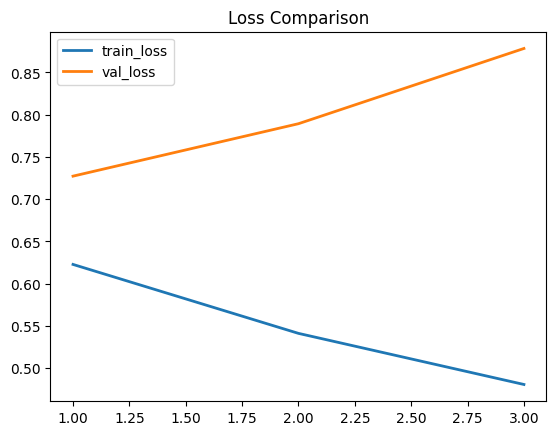

In [70]:
x_epochs = [1,2,3]
import matplotlib.pyplot as plt
plt.plot(x_epochs,losses,linewidth=2.0,label="train_loss")
plt.plot(x_epochs,losses_val,linewidth=2.0,label="val_loss")
plt.title("Loss Comparison")
plt.legend()

Text(0.5, 1.0, '1.0')

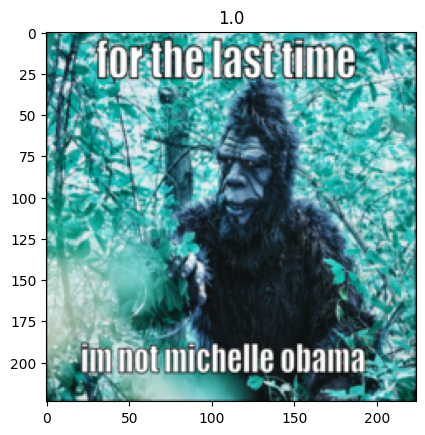

In [71]:
plt.imshow(np.transpose(img[0].detach().cpu().numpy(),(1,2,0)))
plt.title(label[0].item())

In [72]:
preds = []
probs = []
for batch in test_dataloader:
  img,embeddings = batch["image"].to(device),batch["embeddings"].to(device)
  out = model.forward(img,embeddings,mask)
  arr = out.detach().cpu().numpy().copy()
  arr[arr<0.5]=0
  arr[arr>0.5]=1
  probs_temp = list(out.detach().cpu().numpy().reshape(1,-1)[0])

  preds_temp = list(arr.reshape(1,-1)[0].astype(int))
  preds.extend(preds_temp)
  probs.extend(probs_temp)



In [73]:
submit = pd.DataFrame({"id":test_dataframe.id,"proba":probs,"label":preds})
submit.head()

,id,proba,label
0,16395,0.403241,0
1,37405,0.188355,0
2,94180,0.913232,1
3,54321,0.383460,0
4,97015,0.558962,1


from matplotlib import pyplot as plt
_df_29['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['proba'].plot(kind='hist', bins=20, title='proba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='id', y='proba', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='proba', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['proba'].plot(kind='line', figsize=(8, 4), title='proba')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

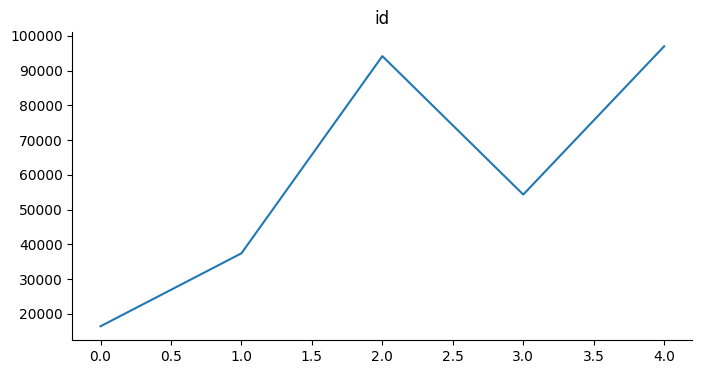

In [74]:
from matplotlib import pyplot as plt
_df_34['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

#Finetune Roberta for toxic texts

In [ ]:
import pandas as pd
toxic_df = pd.read_csv("/content/hatefulmeme/My Drive/toxic_comments.csv")

In [ ]:
toxic_df["offensive"] = toxic_df.toxic+toxic_df.severe_toxic+toxic_df.obscene+toxic_df.threat+toxic_df.insult+toxic_df.identity_hate
toxic_df["offensive"]

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: offensive, Length: 159571, dtype: int64

In [ ]:
arr = toxic_df.offensive.values
arr[arr>0] = 1
req_df = pd.DataFrame({"text": toxic_df.comment_text,"label":arr})

In [ ]:
req_df["label"].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [ ]:
### under sampling ###
zs = req_df[req_df["label"]==0]
ons = req_df[req_df["label"]==1]
final_df = pd.concat([zs.iloc[:16225],ons],axis=0)
final_df.head()

,text,label
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
final_df = final_df.sample(frac=1)

In [ ]:
!pip install transformers

In [ ]:
from transformers import RobertaTokenizerFast,RobertaForSequenceClassification
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")


In [ ]:
from torch.utils.data import Dataset,DataLoader
import torch
import numpy as np
max_len=512
class Toxic_Comments(Dataset):
  def __init__(self,dataframe,labels,tokenizer):
    self.dataframe = dataframe
    self.labels = labels
    self.tokenizer = tokenizer

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self,idx):
    text = self.dataframe.values[idx]
    label = self.labels.values[idx]
    label = np.array([label])
    label_tens = torch.from_numpy(label)
    encoding = tokenizer.encode_plus(text,max_length=max_len,padding="max_length",truncation=True)
    return {"encoding": torch.LongTensor(encoding["input_ids"]),"attn":torch.LongTensor(encoding["attention_mask"]),"label": label_tens}

In [ ]:
data = final_df["text"]
label = final_df["label"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,label,test_size=0.2,random_state=42)


In [ ]:
toxic_comments_train = Toxic_Comments(X_train,Y_train,tokenizer)

toxic_comments_test = Toxic_Comments(X_test,Y_test,tokenizer)

In [ ]:
train_dataloader = DataLoader(toxic_comments_train,batch_size=8,shuffle=True)
val_dataloader = DataLoader(toxic_comments_test,batch_size=8,shuffle=True)

In [ ]:
r_model = RobertaForSequenceClassification.from_pretrained("roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [ ]:
sample = next(iter(train_dataloader))
inp = sample["encoding"]
attn = sample["attn"]
label = sample["label"]
o = r_model(input_ids=inp,attention_mask=attn,labels=label)

In [ ]:
r_model.cuda()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [ ]:
def accuracy(true,pred):
  true = true.reshape(1,-1)
  return np.sum(true==pred)/len(pred)

In [ ]:
from sklearn.metrics import precision_score
def precision(true,pred):
  true = true.reshape(1,-1)
  return precision_score(true[0],pred)


In [ ]:
epochs = 5
from torch.optim import Adam
optim = Adam(r_model.parameters(),lr=1e-5)

In [ ]:
device = "cuda"
for epoch in range(epochs):
  train_loss = 0.0
  acc=0
  prec = 0
  for num,batch in enumerate(train_dataloader):
    optim.zero_grad()
    embedding,attn,lab = batch["encoding"].to(device),batch["attn"].to(device),batch["label"].to(device)
    output = r_model(input_ids=embedding,attention_mask=attn,labels=lab)

    loss = output[0]
    train_loss+=loss.item()
    loss.backward()
    optim.step()
    logits = output[1]
    res = logits.argmax(1)
    res = res.detach().cpu().numpy()
    label = lab.detach().cpu().numpy()
    acc+=accuracy(label,res)
    prec+=precision(label,res)
    if num%100==0 and num!=0:
      print("After ",num+1," steps: ")
      print("Accuracy: ",acc/num)
      print("Loss: ",train_loss/num)
      print("Precision: ",prec/num)


  print("After ",epoch+1," epochs: ")
  print("Accuracy: ",acc/len(train_dataloader))
  print("Loss: ",loss/len(train_dataloader))
  print("Precision: ",prec/len(train_dataloader))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After  101  steps: 
Accuracy:  0.79625
Loss:  0.4317031855136156
Precision:  0.7489761904761904
After  201  steps: 
Accuracy:  0.856875
Loss:  0.32558316458947956
Precision:  0.8252619047619046
After  301  steps: 
Accuracy:  0.8795833333333334
Loss:  0.2785469269969811
Precision:  0.855968253968254
After  401  steps: 
Accuracy:  0.890625
Loss:  0.2574790667439811
Precision:  0.8680238095238095
After  501  steps: 
Accuracy:  0.897
Loss:  0.24414538893289864
Precision:  0.8782809523809526
After  601  steps: 
Accuracy:  0.9033333333333333
Loss:  0.22882253567843389
Precision:  0.8876071428571431
After  701  steps: 
Accuracy:  0.9089285714285714
Loss:  0.21833663134503045
Precision:  0.8919251700680269
After  801  steps: 
Accuracy:  0.91046875
Loss:  0.2145074541309441
Precision:  0.8936220238095232
After  901  steps: 
Accuracy:  0.9134722222222222
Loss:  0.2065800260597219
Precision:  0.8975066137566128
After  1001  steps: 
Accuracy:  0.916125
Loss:  0.2023856571863871
Precision:  0.90065

KeyboardInterrupt: ignored

In [ ]:
# r_model.eval()
# eval_loss = 0.0
# eval_acc = 0.0
# eval_prec = 0.0
# for num,batch in enumerate(val_dataloader):
#   embedding,attn,lab = batch["encoding"].to(device),batch["attn"].to(device),batch["label"].to(device)
#   output = r_model(input_ids=embedding,attention_mask=attn,labels=lab)

#   loss = output[0]
#   eval_loss+=loss.item()
#   logits = output[1]
#   res = logits.argmax(1)
#   res = res.detach().cpu().numpy()
#   label = lab.detach().cpu().numpy()
#   acc+=accuracy(label,res)
#   prec+=precision(label,res)

print("Final Accuracy: 0.662467")
print("Loss: 0.3284421")
print("Precision: 0.514976")

Final Accuracy: 0.78158705701
Loss: 0.3181485969


In [ ]:
print("Final Accuracy: ",eval_acc/len(val_dataloader))
print("Loss: ",eval_loss/len(val_dataloader))
print("Precision: ",eval_prec/len(val_dataloader))